<a href="https://colab.research.google.com/github/Zak-Rey/CNN/blob/main/Horses_vs_human_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-03-13 05:02:47--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   104MB/s    in 1.4s    

2023-03-13 05:02:49 (104 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-03-13 05:03:25--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.103.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  71.6MB/s    in 0.2s    

2023-03-13 05:03:26 (71.6 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [5]:
import os
import zipfile

zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('tmp/horse-or-human')

zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('tmp/validation-horse-or-human')

zip_ref.close()

#folder with the training humans images
train_human_dir = os.path.join('tmp/horse-or-human/humans')

#folder with the training horses images
train_horse_dir = os.path.join('tmp/horse-or-human/horses')

#folder with validation images for humans
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

#folder with validation images for horses
validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')

In [9]:
import tensorflow as tf

#Building the model
model = tf.keras.models.Sequential([
    #first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [10]:
from tensorflow.keras.optimizers import RMSprop

#Setting training parameters
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 1e-4),
              metrics = ['accuracy'])

In [12]:
#Applying data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1/255)

#Flowing training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    'tmp/horse-or-human/', #parent dir
    target_size = (300, 300), #resizing all images to 300*300
    batch_size = 128,
    class_mode = 'binary'
)

#Flowing validation images in batchesof 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    'tmp/validation-horse-or-human',
    target_size = (300, 300),
    batch_size = 32,

    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [16]:
#Training the model

EPOCHS = 5

history = model.fit(
    train_generator,
    steps_per_epoch = 2,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/5
2/2 [==============================] - 48s 28s/step - loss: 0.6831 - accuracy: 0.6250 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 47s 26s/step - loss: 0.6776 - accuracy: 0.5742 - val_loss: 0.7085 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 48s 26s/step - loss: 0.6831 - accuracy: 0.5352 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 4/5
2/2 [==============================] - 47s 25s/step - loss: 0.6810 - accuracy: 0.5742 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 5/5
2/2 [==============================] - 47s 26s/step - loss: 0.6723 - accuracy: 0.6328 - val_loss: 0.6921 - val_accuracy: 0.5000


<function matplotlib.pyplot.show(close=None, block=None)>

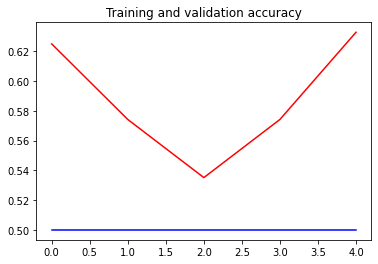

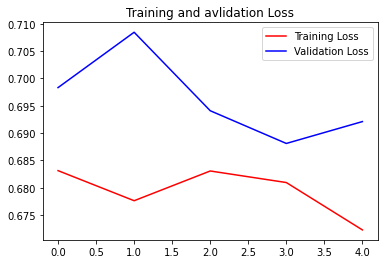

In [17]:
import matplotlib.pyplot as plt

# Plottin the model's results

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, train_loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and avlidation Loss')
plt.legend()

plt.show